In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df =  pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# splitting the dataset
X = df.iloc[:,0:8]
Y = df.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.33 ,random_state =42)

In [ ]:
# fit model on training data 
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train,y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.663595
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.639879
[2]	validation_0-logloss:0.620318
[3]	validation_0-logloss:0.603875
[4]	validation_0-logloss:0.591421
[5]	validation_0-logloss:0.578492
[6]	validation_0-logloss:0.566135
[7]	validation_0-logloss:0.557842
[8]	validation_0-logloss:0.547033
[9]	validation_0-logloss:0.539911
[10]	validation_0-logloss:0.533574
[11]	validation_0-logloss:0.529769
[12]	validation_0-logloss:0.523725
[13]	validation_0-logloss:0.521402
[14]	validation_0-logloss:0.517516
[15]	validation_0-logloss:0.515486
[16]	validation_0-logloss:0.51281
[17]	validation_0-logloss:0.509647
[18]	validation_0-logloss:0.507565
[19]	validation_0-logloss:0.505985
[20]	validation_0-logloss:0.504101
[21]	validation_0-logloss:0.501856
[22]	validation_0-logloss:0.501653
[23]	validation_0-logloss:0.501521
[24]	validation_0-logloss:0.501283
[25]	validation_0-logloss:0.499344
[26]	validation_0-logloss:0.50052

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions for test data
predictions = model.predict(X_test)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.38%


## Feature Importance using XGBoost

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

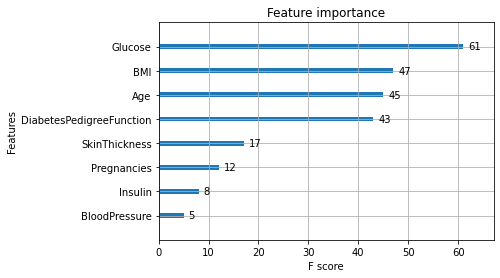

In [ ]:
# plot feature importance
plot_importance(model)
pyplot.show()

## XGBoost trees diagram

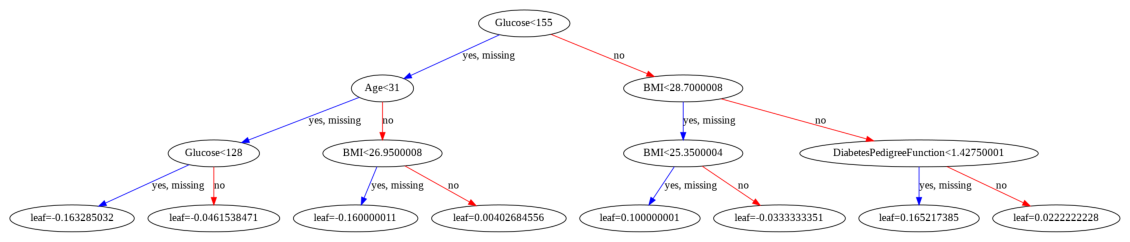

In [ ]:
# plot_tree in xgboost gives a pictorial representation of the trees made
import xgboost as xgb
plt.figure(figsize=(20,15))
xgb.plot_tree(model, ax=plt.gca());

## hyperparameter Optimization for XGBoost Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Make XGBoost Classifier Model

model = xgb.XGBClassifier()

# Give a feature subspace ( ranges of the parameters the algo. needs to search )

n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# Implement Grid search Cross validation technique

grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# take means of the results of the Grid search algo.
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']

params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.471894 using {'n_estimators': 50}
-0.471894 (0.061527) with: {'n_estimators': 50}
-0.486596 (0.074704) with: {'n_estimators': 100}
-0.506686 (0.081122) with: {'n_estimators': 150}
-0.527253 (0.084650) with: {'n_estimators': 200}
-0.551991 (0.090510) with: {'n_estimators': 250}
-0.576936 (0.094518) with: {'n_estimators': 300}
-0.593311 (0.099734) with: {'n_estimators': 350}


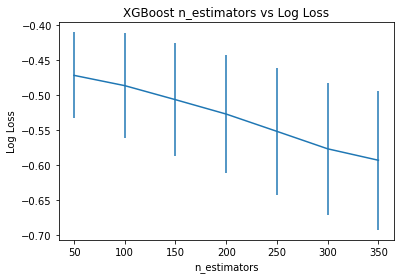

In [ ]:
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')